Importing all the modules

In [1]:
import datetime as dt
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


Specifying the Date

In [2]:
end = dt.date.today()
start = dt.datetime(end.year,end.month-1,end.day)

Collecting the DataSet

In [4]:
com_df1 = pd.DataFrame(data.DataReader('BSE/BOM532978', 'quandl', start=start, end=end )['Close'])    #Bajaj_Finserv

In [5]:
com_df2 = pd.DataFrame(data.DataReader('BSE/BOM500387', 'quandl', start=start, end=end )['Close'])    #ICICI_Prudentia

In [6]:
com_df3 = pd.DataFrame(data.DataReader('BSE/BOM533519', 'quandl', start=start, end=end )['Close'])    #LT_Finance

In [7]:
com_df4 = pd.DataFrame(data.DataReader('BSE/BOM500490', 'quandl', start=start, end=end )['Close'])    #Bajaj_Holdings

In [8]:
com_df5 = pd.DataFrame(data.DataReader('BSE/BOM532960', 'quandl', start=start, end=end )['Close'])    #Indiabulls_Vent

Renaming the close columns

In [9]:
Bajaj_Finserv = com_df1.rename(columns={'Close':'Bajaj_Finserv'})
ICICI_Prudentia = com_df2.rename(columns={'Close':'ICICI_Prudentia'})
LT_Finance = com_df3.rename(columns={'Close':'LT_Finance'})
Bajaj_Holdings = com_df4.rename(columns={'Close':'Bajaj_Holdings'})
Indiabulls_Vent = com_df5.rename(columns={'Close':'Indiabulls_Vent'})

Joinig all the data frames

In [10]:
close_df = (((Bajaj_Finserv.join(ICICI_Prudentia, how="outer")).join(LT_Finance, how="outer")).join(Bajaj_Holdings, how="outer")).join(Indiabulls_Vent,how="outer")

In [11]:
close_df

,Bajaj_Finserv,ICICI_Prudentia,LT_Finance,Bajaj_Holdings,Indiabulls_Vent
Date,,,,,
2018-08-14,7073.10,17276.65,179.05,2985.25,744.65
2018-08-13,6949.55,17158.20,174.55,2979.80,710.10
2018-08-10,7086.20,17259.90,177.30,2989.80,712.95
2018-08-09,7070.50,17273.70,180.75,2999.50,679.00
2018-08-08,7050.25,17227.50,174.80,2986.10,650.65
2018-08-07,7006.35,17218.50,176.40,2968.75,659.50
2018-08-06,6913.75,17373.90,179.90,2965.25,639.50
2018-08-03,6931.30,17446.00,181.00,2978.60,625.00
2018-08-02,6908.10,17423.25,175.25,2938.75,602.00


In [12]:
import seaborn as sns
sns.set_style('whitegrid')

In [13]:
rets = close_df.pct_change()                                    #returns -- one day percent change for each of the stocks
rets.head()

,Bajaj_Finserv,ICICI_Prudentia,LT_Finance,Bajaj_Holdings,Indiabulls_Vent
Date,,,,,
2018-08-14,NaN,NaN,NaN,NaN,NaN
2018-08-13,-0.017468,-0.006856,-0.025133,-0.001826,-0.046398
2018-08-10,0.019663,0.005927,0.015755,0.003356,0.004014
2018-08-09,-0.002216,0.000800,0.019459,0.003244,-0.047619
2018-08-08,-0.002864,-0.002675,-0.032918,-0.004467,-0.041753


# Pair Plotting

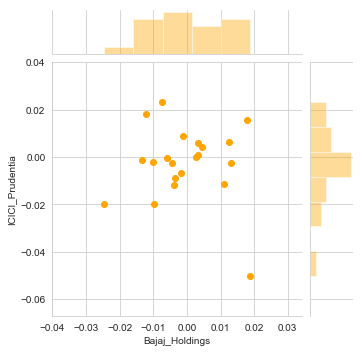

In [14]:
sns.jointplot('Bajaj_Holdings','ICICI_Prudentia',rets, kind='scatter',height=5, color='orange')

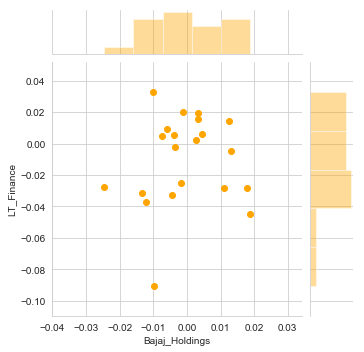

In [15]:
sns.jointplot('Bajaj_Holdings','LT_Finance',rets, kind='scatter',height=5, color='orange')

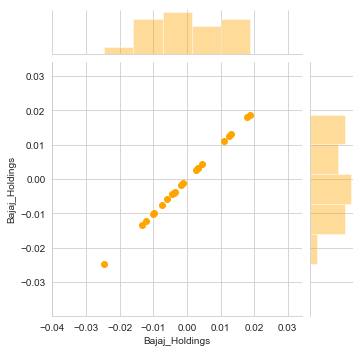

In [16]:
sns.jointplot('Bajaj_Holdings','Bajaj_Holdings',rets, kind='scatter',height=5, color='orange')

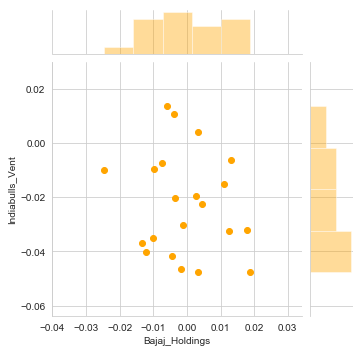

In [17]:
sns.jointplot('Bajaj_Holdings','Indiabulls_Vent',rets, kind='scatter',height=5, color='orange')

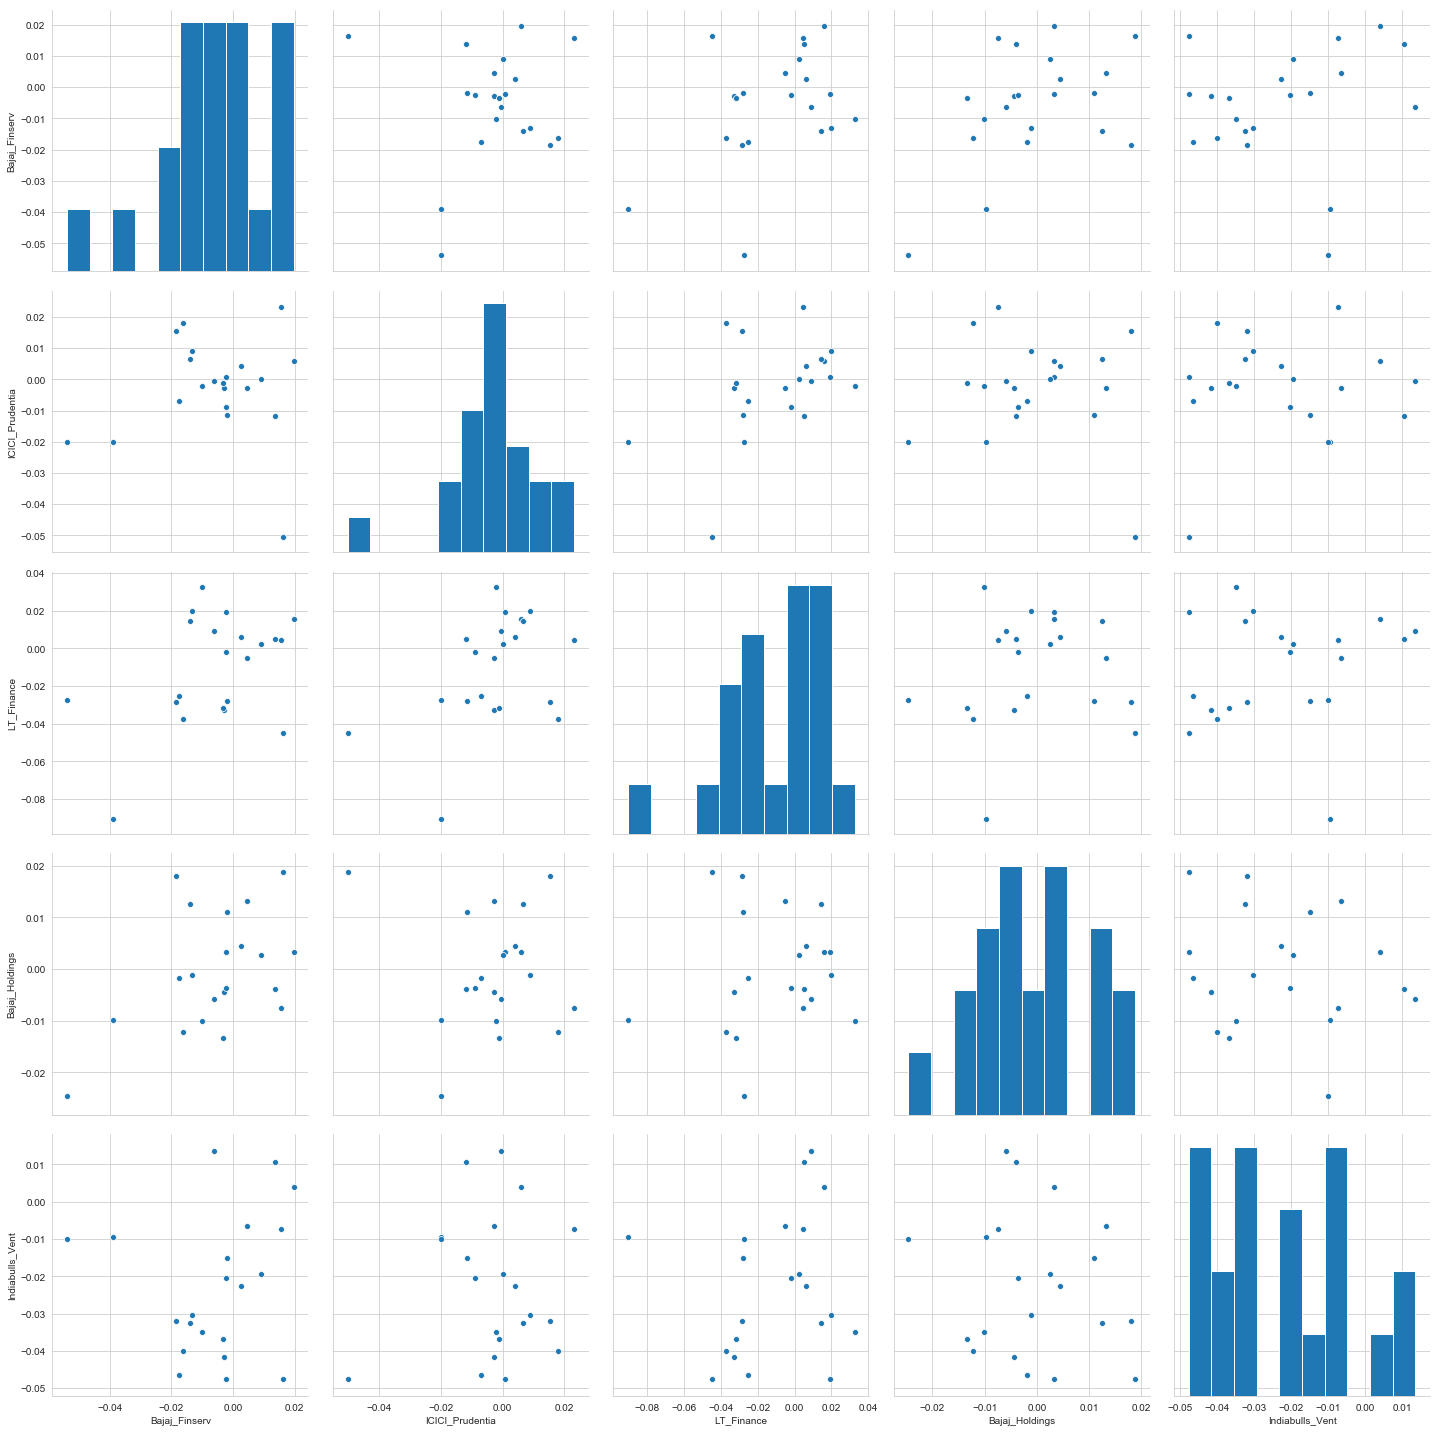

In [18]:
sns.pairplot(rets.dropna(),height=4)

# Correlation Matrix

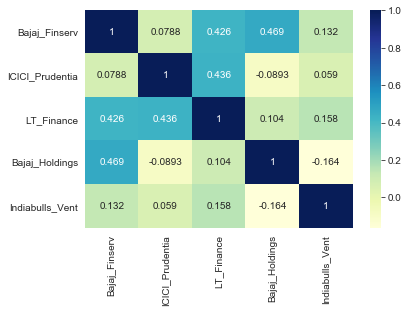

In [19]:
sns.heatmap(rets.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

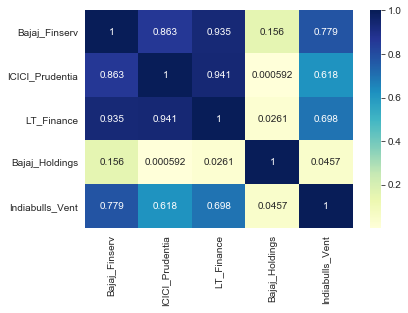

In [20]:
sns.heatmap(close_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<H2> Risk Return Analysis

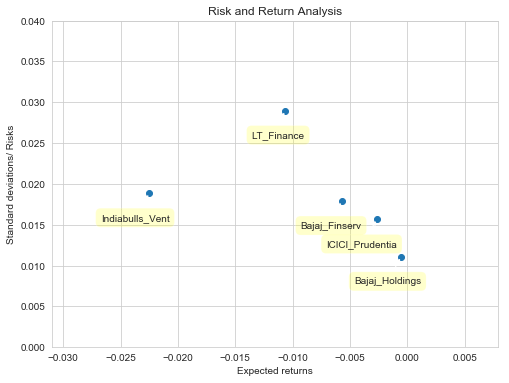

In [21]:
fig, ax = pt.subplots(figsize=(8,6))
pt.scatter(rets.mean(), rets.std())
pt.xlabel('Expected returns')
pt.ylabel('Standard deviations/ Risks')
pt.title('Risk and Return Analysis')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    pt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [22]:
import numpy as np
import statsmodels.api as sm
X=close_df[['ICICI_Prudentia','LT_Finance','Bajaj_Finserv','Indiabulls_Vent']]
X = sm.add_constant(X)
y=close_df['Bajaj_Holdings']
model = sm.OLS(y,X,missing='drop')             #drop rows with missing values
result = model.fit()                           #adjusts the data to model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Bajaj_Holdings   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.8505
Date:                Wed, 15 Aug 2018   Prob (F-statistic):              0.513
Time:                        00:55:03   Log-Likelihood:                -104.15
No. Observations:                  22   AIC:                             218.3
Df Residuals:                      17   BIC:                             223.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2509.6745    564.284      4.448      0.000    1319.139    3700.210
ICICI_Prudentia    -0.0076      0.042     -0.180      0.859      -0.096       0.081
LT_Finance         -2.1596      2.291     -0.943      0.359      -6.993       2.674
Bajaj_Finserv       0.1493      0.083      1.808      0.088      -0.025       0.323
Indiabulls_Vent    -0.1026      0.134     -0.768      0.453      -0.385       0.179
==============================================================================
Omnibus:                        2.179   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.133
Skew:                          -0.548   Prob(JB):                        0.568
Kurtosis:                       3.192   Cond. No.                     1.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Plotting the Predicted values and actual values to the model

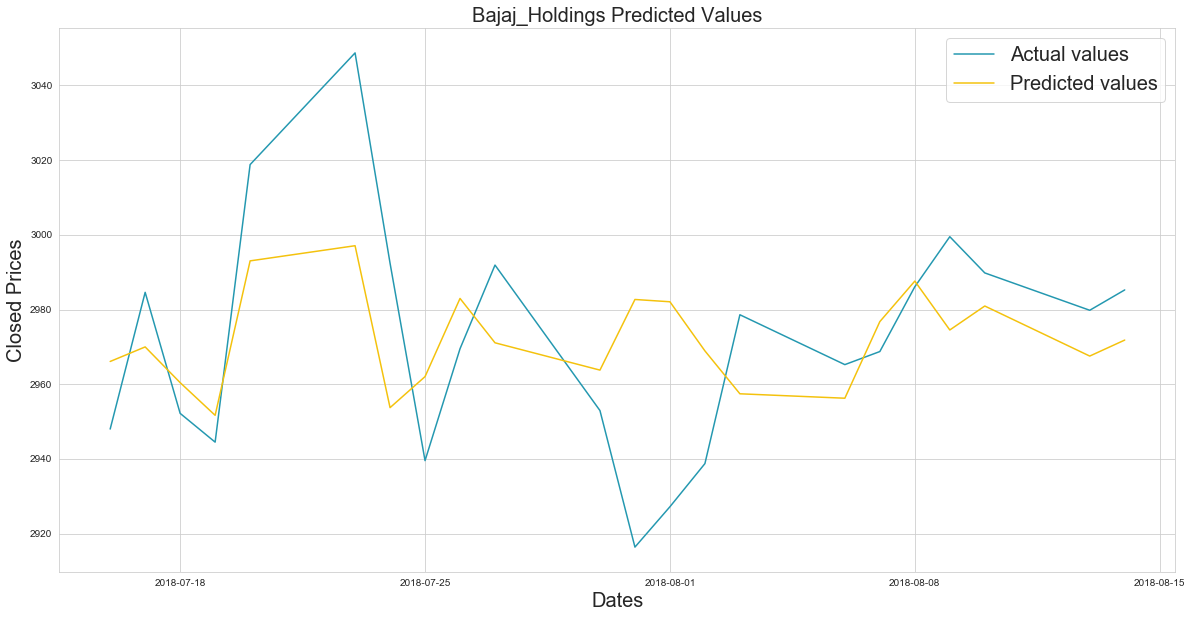

In [23]:
fig, ax = pt.subplots(figsize=(20,10))
ax.plot(y, color="#2498B0", label="Actual values")
ax.plot(result.fittedvalues, color='#f4c20d', label="Predicted values")
ax.set_xlabel('Dates',size=20)
ax.set_ylabel('Closed Prices',size=20)
ax.set_title('Bajaj_Holdings Predicted Values',size=20)
p,q = ax.get_legend_handles_labels()
ax.legend(p, q)
pt.legend(prop={'size':20})